In [2]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm

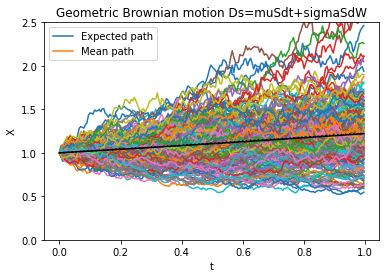

In [22]:
#Monte Carlo simulation of geometric Brownian motion
#dS=mu*S*dt+sigma*S*dW

#Define parameters and time grid
number_paths=2000 #number of paths
T=1 #time horizon
number_steps=200 #number of time steps
dt=T/number_steps #time step
t=np.arange(0,T,dt) #observation times 
muGBM=0.2 #sigma
sigma=0.3 #model parameters
So=1 #initial stock price
muABM=muGBM-0.5*sigma**2 #drift of the corresponding arithmetic BM

#Monte Carlo

#Compute the increments of the arithmetic Brownian motion X =log(S/S0)
dX_X=(muABM)*dt+sigma*np.random.randn(number_paths,number_steps)*np.sqrt(dt)
dX_X=np.insert(dX_X,0,0,axis=1)
dX_X=np.delete(dX_X,-1,axis=1)

#Accumulate the increments
X=np.cumsum(dX_X,axis=1)

#transform to geomtric Brownian motion
S=So*np.exp(X)

#Expected mean and sample paths
plt.figure(1)
df = pd.concat([pd.Series(x) for x in S], axis=1)
df.index=t 
mean_per_step=list(df.apply(lambda row: np.mean(row),axis=1))
EX=So*np.exp(muGBM*t) #expected paths
for z in range(number_steps):
    plt.plot(t,S[z])
plt.plot(t,EX,'k',t,mean_per_step,':k')
plt.legend(['Expected path','Mean path'])
plt.ylim([0,2.5])
plt.xlabel('t')
plt.ylabel('X')
plt.title('Geometric Brownian motion Ds=muSdt+sigmaSdW')
plt.show()

Text(0.5, 0, 'x')

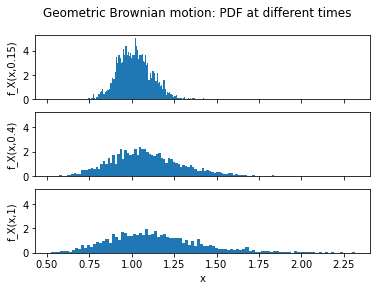

In [18]:
nbins=100
fig, axs = plt.subplots(3,sharex=True,sharey=True)
fig.suptitle('Geometric Brownian motion: PDF at different times')
axs[0].hist(S[:,20],bins=nbins,density=True)
axs[0].set_ylabel('f_X(x,0.15)')
axs[1].hist(S[:,80],bins=nbins,density=True)
axs[1].set_ylabel('f_X(x,0.4)')
axs[2].hist(S[:,120],bins=nbins,density=True)
axs[2].set_ylabel('f_X(x,1)')
axs[2].set_xlabel('x')